<a href="https://colab.research.google.com/github/jassi0216/CodSoft_Task1/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df=pd.read_csv("tested.csv")


In [ ]:
print(df.shape)

(418, 12)


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

lets visualize the survival wrt to class:

<Axes: xlabel='Survived', ylabel='count'>

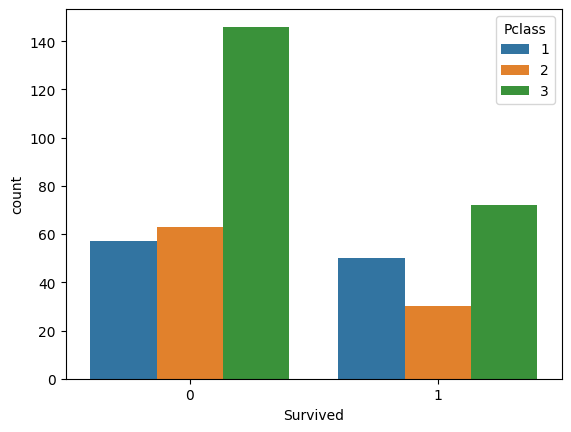

In [ ]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [ ]:
df["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

Lets vivualize the survival wrt to sex

<Axes: xlabel='Survived', ylabel='count'>

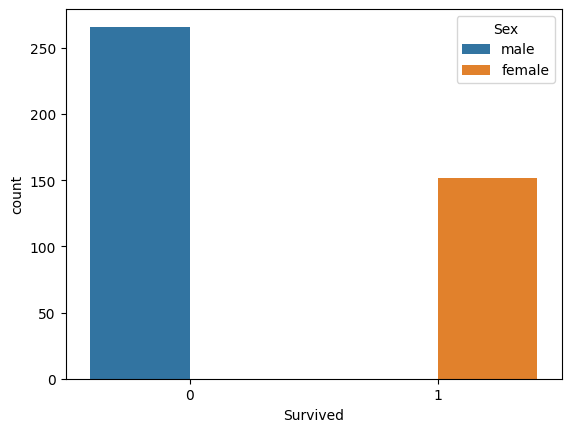

In [ ]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

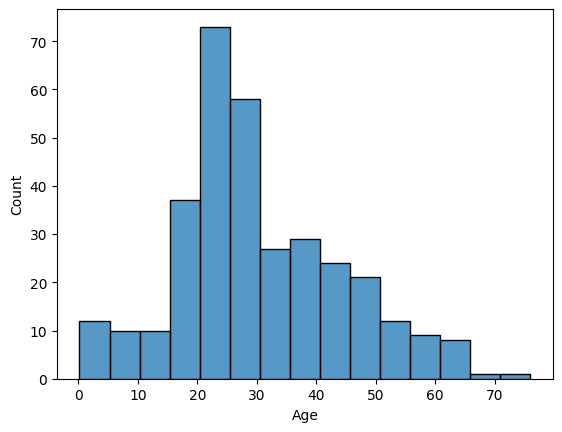

In [ ]:
sns.histplot(data=df, x='Age')
plt.show()

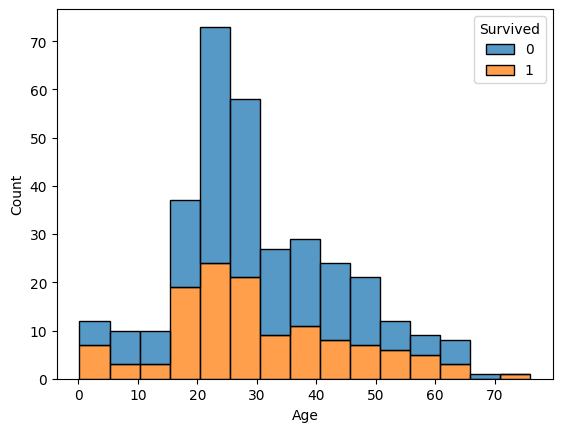

In [ ]:
#Show survival wrt Age
sns.histplot(x=df['Age'], hue=df['Survived'],multiple='stack')
plt.show()

In [ ]:
#Taking out the important features
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

#deleting rows having null values in fare column
df=df.dropna(subset="Fare")

#filling the missing values of the age column by median age
df['Age']=df['Age'].fillna(df['Age'].median())

df['Embarked'].fillna('S',inplace=True)


Before modeling the data, transform gender (Sex) into numeric
  

*   male=1
*   female=0



In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,0,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q
3,0,3,1,27.0,0,0,8.6625,S
4,1,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,8.0500,S
414,1,1,0,39.0,0,0,108.9000,C
415,0,3,1,38.5,0,0,7.2500,S
416,0,3,1,27.0,0,0,8.0500,S


In [ ]:
# Select features and target variable
X = df[['Sex','Pclass']]
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state = 0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = log.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.00
Confusion Matrix:
[[43  0]
 [ 0 41]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        41

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
sex=int(input("Enter 1:male or 2:female"))
pclass=int(input("Enter the class 1:High class 2:medium class 3:Lw class"))
new=[[sex,pclass]]
result=model.predict(scaler.transform(new))
print(result)
if result==1:
  print("Survived")
else:
  print("Not Survived")

Enter 1:male or 2:female1
Enter the class 1:High class 2:medium class 3:Lw class2
[0]
Not Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
